In [1]:
# download your whole fb archive from https://www.facebook.com/dyi
# do fbcap ./messages.csv -f json > messages.csv -z CST=-0600,CDT=-0500 in command line
%matplotlib inline

from ahh import era, vis, sci
import datetime
import pandas as pd
import numpy as np
import string
import time

/home/solactus/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [48]:
IGNORE_LIST = 'to, the, on, its, nan, a, it, is, of, in, for, that, my, at'.split(', ')
YEARS = range(2012, 2017)
HOURS = range(0, 24)
TIMES_OF_DAY = ['Dawn', 'Morning', 'Afternoon', 'Evening', 'Dusk']

In [3]:
df = pd.read_csv('messages.csv')
dates = df['date']
dts = era.time2dt(dates, strf='infer')

In [4]:
local_dts = [(dt - datetime.timedelta(hours=int(date[-4]))).hour for (dt, date) in zip(dts, dates)]
df = df.assign(datetime=dts, hour=local_dts, year=dts.year, time_of_day=df['date'])
df.loc[(df['hour'] >= 22) | (df['hour'] < 3), 'time_of_day'] = TIMES_OF_DAY[-1]
df.loc[(df['hour'] >= 3) & (df['hour'] < 7), 'time_of_day'] = TIMES_OF_DAY[0]
df.loc[(df['hour'] >= 7) & (df['hour'] < 12), 'time_of_day'] = TIMES_OF_DAY[1]
df.loc[(df['hour'] >= 12) & (df['hour'] < 17), 'time_of_day'] = TIMES_OF_DAY[2]
df.loc[(df['hour'] >= 17) & (df['hour'] < 22), 'time_of_day'] = TIMES_OF_DAY[3]
df = df.sort_values('date', ascending=True)

In [40]:
def get_top_words(df, sender=None, nwords=50, time_of_day=None, year=None, hour=None, ignore_list=IGNORE_LIST):
    if sender is not None:
        df = df.loc[df['sender'] == sender, :]
    if year is not None:
        df = df.loc[df['year'] == year, :]
    if hour is not None:
        df = df.loc[df['hour'] == hour, :]
    if time_of_day is not None:
        df = df.loc[df['time_of_day'] == time_of_day, :]
    msgs = df['message']
    words = " ".join(msgs.astype(str).tolist()).split(' ')
    words = [item.lower() for item in words]
    words = [s for s in words if s]
    words_count = dict(sci.get_counts(words, show=False))
    del words_count['total']
    if ignore_list is not None:
        for word in ignore_list:
            try:
                del words_count[word]
            except:
                pass
    top_words = sorted(words_count, key=words_count.get, reverse=True)[:nwords]
    top_words_count = []
    for twords in top_words:
        top_words_count.append(words_count[twords])
    return top_words, top_words_count


def plot_words(top_words, top_words_count, rows=1, cols=1, pos=1, figsize=(20, 5), 
               name=None, year=None, hour=None, time_of_day=None):
    if name is None:
        name = ''
    else:
        name += '\'s '
    if year is None:
        year = '2012-2016'
    if hour is None:
        hour = ''
    else:
        hour = '{:02d} Central '.format(hour)
    if time_of_day is None:
        time_of_day = ''
    else:
        time_of_day += ' '
    ax = vis.plot_bar(top_words, top_words_count, figsize=figsize,
                      title='{year} {hour}{time_of_day}{name}Top {length} Words'.format(name=name,
                      year=year, hour=hour, time_of_day=time_of_day, length=len(top_words)))
    vis.set_major_tick_labels(ax, xrotation=90)
    vis.set_major_grid(ax, xgrid=False)
    return ax

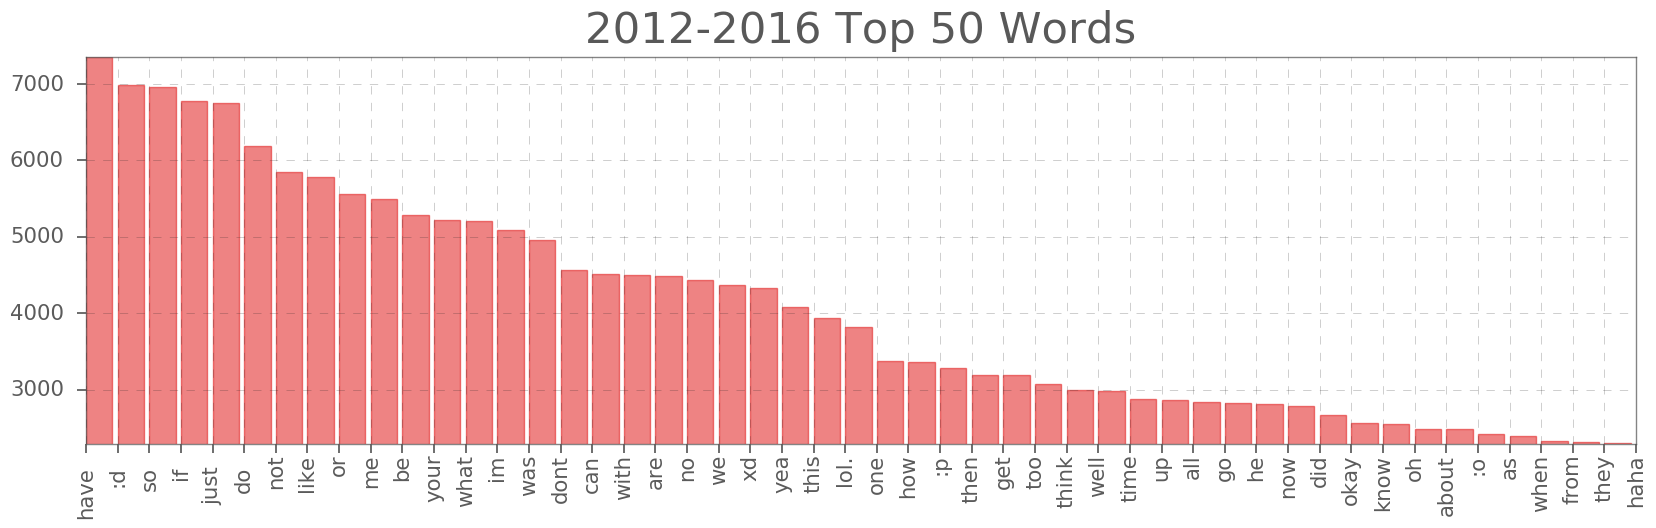

In [6]:
sender = 'Andrew Huang'
nwords = 50
top_words, top_words_count = get_top_words(df, sender=sender, nwords=nwords)
plot_words(top_words, top_words_count)

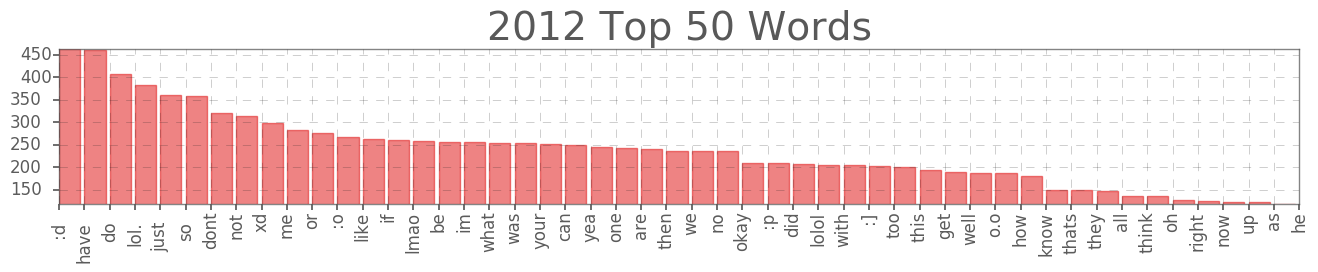

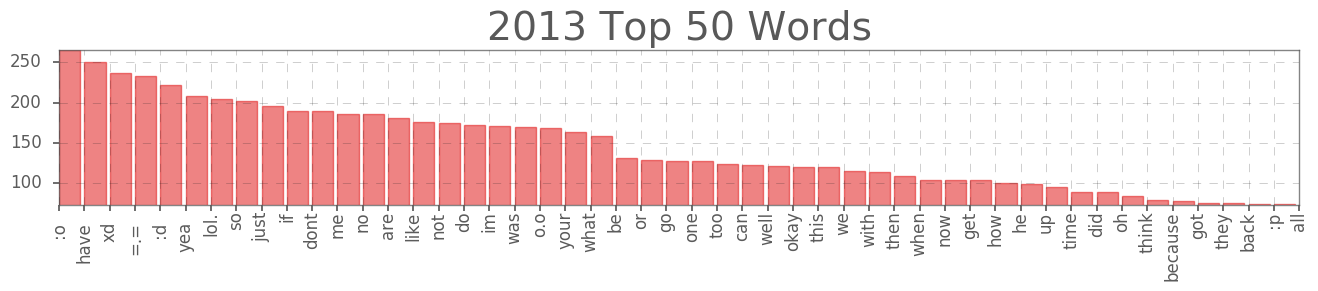

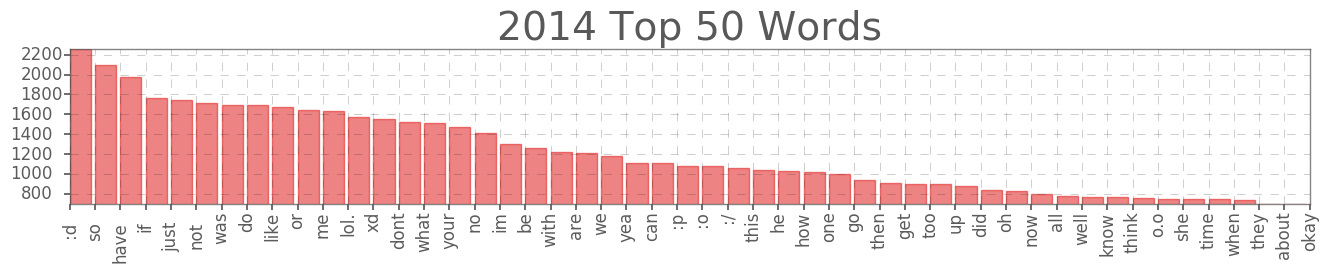

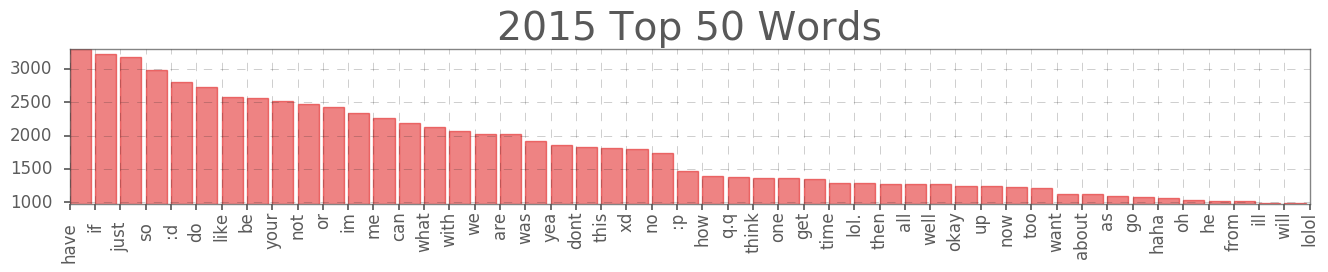

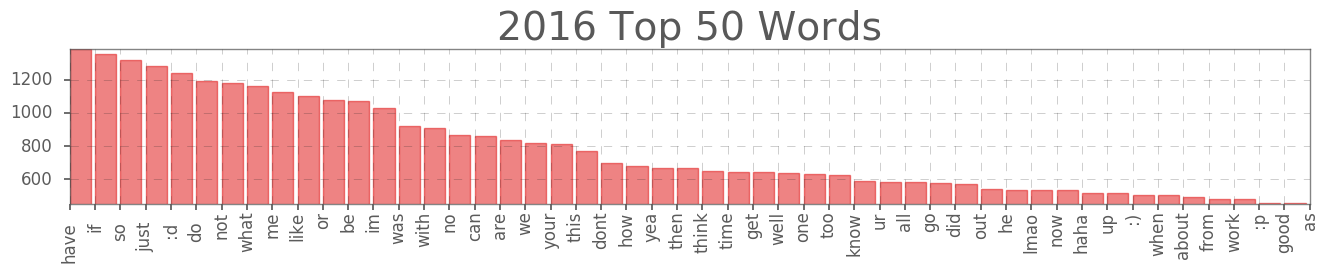

In [7]:
for i, year in enumerate(YEARS):
    top_words, top_words_count = get_top_words(df, sender=sender, year=year, nwords=nwords)
    plot_words(top_words, top_words_count, year=year, rows=len(YEARS), cols=1, pos=i, figsize=(16, 2))

In [8]:
# sender = 'Andrew Huang'
# nwords = 10

# for i, hour in enumerate(HOURS):
#     try:
#         top_words, top_words_count = get_top_words(df, sender=sender, hour=hour, nwords=nwords, ignore_list=IGNORE_LIST)
#         plot_words(top_words, top_words_count, hour=hour, rows=len(HOURS), cols=1, pos=i, figsize=(16, 2))
#     except:
#         pass

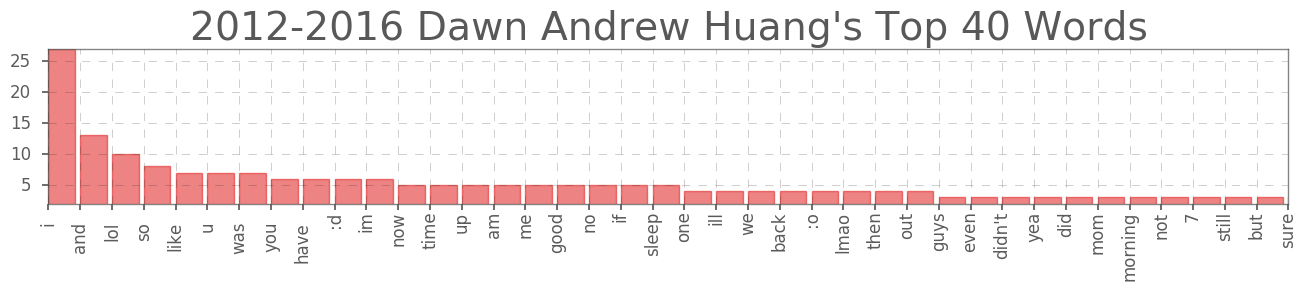

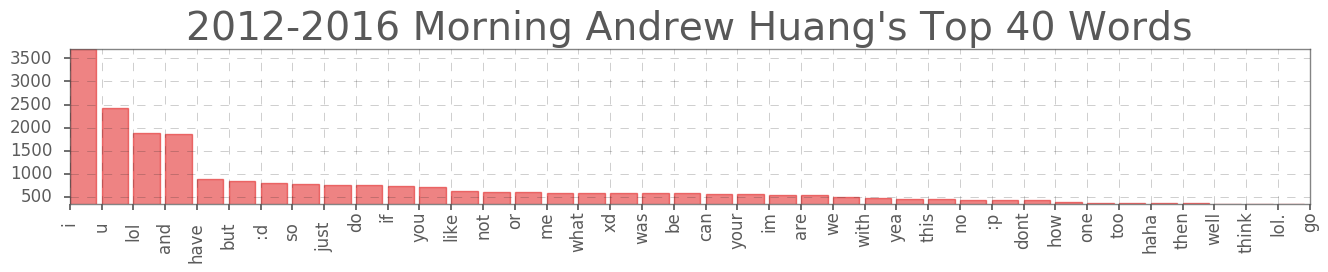

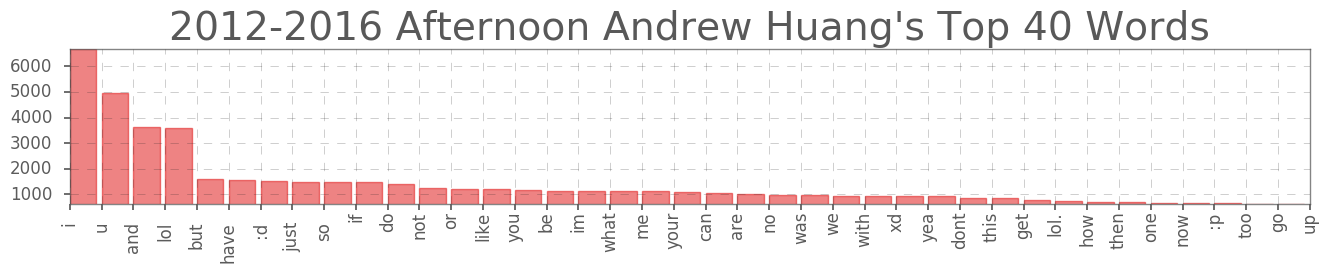

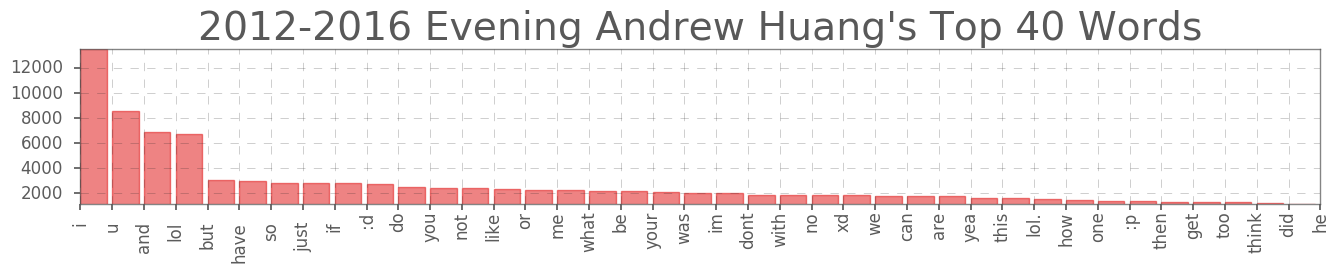

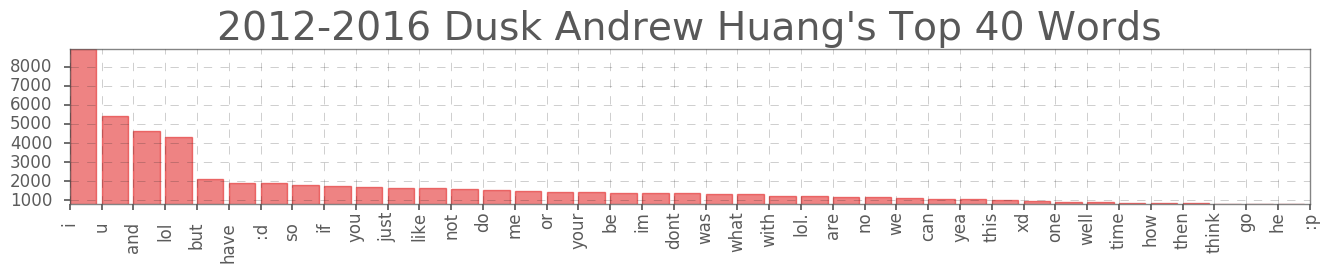

In [49]:
sender = 'Andrew Huang'
nwords = 40

for i, time_of_day in enumerate(TIMES_OF_DAY):
    try:
        top_words, top_words_count = get_top_words(df, time_of_day=time_of_day, sender=sender, nwords=nwords, ignore_list=IGNORE_LIST)
        plot_words(top_words, top_words_count, time_of_day=time_of_day, name=sender, rows=len(time_of_day), cols=1, pos=i, figsize=(16, 2))
    except Exception as e:
        print(e)
        pass